## Business Opportunity: 5% Claim Rate Target

### Current State
- Current claim rate: 6.43% (3,846 claims from 59,806 customers)
- Target: Reduce to 5% using ML customer selection

### Business Impact
- Additional customers: 17,114 more (76,920 total possible)
- Same claims cost: 3,846 claims maintained
- Result: More revenue, same expenses = higher profit

### ML Strategy
- Score new applicants by claim risk
- Approve only customers with predicted risk <= 5%
- Achieve portfolio-wide 5% claim rate through selective underwriting

### Value Proposition
Data-driven customer selection enables profitable growth while controlling risk.

## Data Loading and Initial Exploration

This section loads the insurance dataset and performs initial exploration to understand the data structure and characteristics.

### Import Required Libraries
- seaborn: Statistical data visualization
- sklearn modules: Machine learning tools for model training and evaluation
- pandas/numpy: Data manipulation (imported earlier)

### Dataset Overview
- Load synthetic insurance data from CSV file
- Display basic dataset information: shape, columns, data types
- Preview first few rows to understand data structure

### Initial Data Assessment
- Column inventory: Complete list of available features
- Data types: Distribution of numerical vs categorical features  
- Dataset size: Total customers and feature count for scope understanding

This exploration establishes our baseline understanding before proceeding with detailed analysis and modeling.

In [65]:
# Load insurance dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                           roc_curve, precision_recall_curve, average_precision_score)
print("Loading insurance dataset...")

# Load the data
df = pd.read_csv("generated_synthetic_task_data.csv")

print(f"Dataset loaded successfully. Shape: {df.shape}")
print(f"Columns: {df.shape[1]}, Rows: {df.shape[0]:,}")

# Display column information
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
   print(f"{i:2d}. {col}")

# Check first few rows
print("\nFirst 5 rows:")
print(df.head())

# Data types summary
print("\nData types:")
print(df.dtypes.value_counts())

Loading insurance dataset...
Dataset loaded successfully. Shape: (59806, 30)
Columns: 30, Rows: 59,806

Column names:
 1. policy_identifier
 2. policy_renewal_number
 3. policy_premium_band
 4. customer_age
 5. location_code
 6. location_score
 7. market_segment
 8. policy_type
 9. payment_frequency
10. customer_education_level
11. customer_occupation_sector
12. policy_category_two
13. policy_cover_level
14. customer_email_verified
15. payment_method
16. is_joint_policy
17. other_policy_flag
18. policy_excess
19. customer_home_ownership
20. customer_credit_one
21. customer_credit_two
22. customer_credit_three
23. customer_salary_band
24. customer_age_scaled
25. policy_start_date
26. policy_end_date
27. claim_reported_date
28. customer_gender
29. additional_customer_flag
30. policy_item_category

First 5 rows:
  policy_identifier  policy_renewal_number  policy_premium_band  customer_age  \
0         PL_045360                      9                    1            41   
1         PL_0167

## Target Variable Creation and Analysis

This section creates the binary target variable for our machine learning model and analyzes the current claim distribution.

#Target Variable Definition
- Identify claim-related columns in the dataset
- Create binary target variable (claim_flag): 1 = customer filed a claim, 0 = no claim
- Use claim_reported_date column to determine if a customer has made a claim

# Class Distribution Analysis
- Calculate total customers and claim counts
- Determine current claim rate percentage
- Compare current rate to business target of 5%

# Business Opportunity Assessment
- Calculate potential customer capacity if 5% target is achieved
- Estimate additional customers that could be served
- Quantify the business value of improved risk selection

This analysis establishes the baseline performance and quantifies the potential business impact of achieving the 5% claim rate target through machine learning.

In [6]:
# Create target variable for claim prediction
print("Creating target variable...")

# Identify claim-related columns
claim_columns = [col for col in df.columns if 'claim' in col.lower()]
print(f"Claim-related columns: {claim_columns}")

# Create binary target variable
if 'claim_reported_date' in df.columns:
    df['claim_flag'] = df['claim_reported_date'].notna().astype(int)
elif len(claim_columns) > 0:
    claim_col = claim_columns[0]
    df['claim_flag'] = df[claim_col].notna().astype(int)
else:
    print("Warning: No clear claim column found")

# Analyze target distribution
if 'claim_flag' in df.columns:
    total_customers = len(df)
    total_claims = df['claim_flag'].sum()
    claim_rate = total_claims / total_customers
    
    print(f"\nTarget variable analysis:")
    print(f"Total customers: {total_customers:,}")
    print(f"Customers with claims: {total_claims:,}")
    print(f"Customers without claims: {total_customers - total_claims:,}")
    print(f"Current claim rate: {claim_rate:.3f} ({claim_rate*100:.1f}%)")
    print(f"Target claim rate: 0.050 (5.0%)")
    
    if claim_rate > 0.05:
        potential_customers = total_claims / 0.05
        additional_customers = potential_customers - total_customers
        print(f"Potential customers at 5% rate: {potential_customers:,.0f}")
        print(f"Additional customer capacity: {additional_customers:,.0f}")

Creating target variable...
Claim-related columns: ['claim_reported_date', 'claim_flag']

Target variable analysis:
Total customers: 59,806
Customers with claims: 3,846
Customers without claims: 55,960
Current claim rate: 0.064 (6.4%)
Target claim rate: 0.050 (5.0%)
Potential customers at 5% rate: 76,920
Additional customer capacity: 17,114


## Data Preprocessing and Feature Preparation

This section transforms the raw insurance data into a format suitable for machine learning models while preserving business interpretability and ensuring regulatory compliance.

### Step-by-Step Transformation Process

#### Step 1: Data Copy and Target Variable Verification
- Create a working copy of the original dataset to preserve raw data
- Ensure the target variable (claim_flag) is included from the previous target creation step
- Maintains data integrity throughout the preprocessing pipeline

#### Step 2: Binary Text-to-Numeric Conversion
Convert text-based binary features to numeric format required by ML algorithms:

Transformations Applied:
- customer_email_verified: 'TRUE' → 1, 'FALSE' → 0
- is_joint_policy: 'Yes' → 1, 'No' → 0
- payment_method: 'X' → 1, 'Y' → 0

Business Rationale: These represent clear binary states (verified/unverified, joint/individual, method A/method B) that maintain their original meaning while becoming mathematically usable.

#### Step 3: Column Removal
Remove non-predictive and redundant features:

Dropped Columns:
- policy_identifier: Unique ID with no predictive value
- policy_start_date/policy_end_date: Date information not relevant for risk prediction
- claim_reported_date: Already used to create target variable, no longer needed
- other_policy_flag: Constant value across all records (no discriminatory power)

Impact: Reduces feature space while retaining all predictive information.

#### Step 4: Categorical Feature Encoding
Apply Label Encoding to convert categorical text data to numeric format:

Process:
- Automatically detect all remaining text-based columns
- Assign unique numeric codes to each category within each feature
- Preserve categorical relationships while enabling model compatibility

Examples:
- customer_gender: 'Male' → 2, 'Female' → 0, 'Prefer not to say' → 3
- location_code: 'RL_8' → 20, 'RL_2' → 11, etc.

#### Step 5: Missing Value Treatment
Systematic handling of any incomplete data:
- Detect missing values across all features
- Apply median imputation for numeric stability
- Ensure complete dataset for model training

#### Step 6: Validation and Output
Final verification of processed dataset:
- Confirm all features are numeric
- Display dataset dimensions and sample records
- Validate successful transformation completion

In [7]:
# Feature engineering and complete transformations

from sklearn.preprocessing import LabelEncoder

# Create working copy
df_processed = df.copy()

# 1. Ensure claim_flag exists
if 'claim_flag' not in df_processed.columns:
    print("Adding claim_flag to processed data")
    df_processed['claim_flag'] = df['claim_flag']

# 2. Convert binary text columns to numeric
print("Converting binary columns...")
boolean_mappings = {
   'customer_email_verified': {'TRUE': 1, 'FALSE': 0},
   'is_joint_policy': {'Yes': 1, 'No': 0},
   'payment_method': {'X': 1, 'Y': 0}
}

for col, mapping in boolean_mappings.items():
   if col in df_processed.columns:
       df_processed[col] = df_processed[col].map(mapping)
       print(f"Converted {col} to binary")

# 3. Drop unnecessary columns
columns_to_drop = [
   'policy_identifier', 'policy_start_date', 'policy_end_date',
   'claim_reported_date', 'other_policy_flag'
]
existing_columns_to_drop = [col for col in columns_to_drop if col in df_processed.columns]
df_processed = df_processed.drop(columns=existing_columns_to_drop)
print(f"Dropped columns: {existing_columns_to_drop}")

# 4. Encode categorical features
print("Encoding categorical features...")
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_features:
   le = LabelEncoder()
   df_processed[col] = le.fit_transform(df_processed[col].astype(str))
   label_encoders[col] = le
   print(f"Encoded {col}: {df_processed[col].nunique()} categories")

# 5. Handle missing values
print("Handling missing values...")
missing_data = df_processed.isnull().sum()
if missing_data.any():
   print("Found missing values - filling with median/mode")
   df_processed = df_processed.fillna(df_processed.median())
else:
   print("No missing values found")

# 6. Display final processed dataframe
print(f"\nPreprocessing complete. Final shape: {df_processed.shape}")
print(df_processed.head())



Converting binary columns...
Converted customer_email_verified to binary
Converted is_joint_policy to binary
Converted payment_method to binary
Dropped columns: ['policy_identifier', 'policy_start_date', 'policy_end_date', 'claim_reported_date', 'other_policy_flag']
Encoding categorical features...
Encoded location_code: 22 categories
Encoded market_segment: 6 categories
Encoded policy_type: 11 categories
Encoded payment_frequency: 3 categories
Encoded customer_education_level: 10 categories
Encoded customer_occupation_sector: 9 categories
Encoded policy_category_two: 11 categories
Encoded customer_home_ownership: 4 categories
Encoded customer_gender: 4 categories
Encoded policy_item_category: 16 categories
Handling missing values...
Found missing values - filling with median/mode

Preprocessing complete. Final shape: (59806, 26)
   policy_renewal_number  policy_premium_band  customer_age  location_code  \
0                      9                    1            41             20   
1 

In [52]:
# Save processed data to CSV for inspection
df_processed.to_csv("processed_insurance_data.csv", index=False)

Feature Selection Threshold Analysis

I evaluated multiple feature selection thresholds ranging from 95% to 99.99% to balance model efficiency with business relevance. I chose the 99% threshold which captured 17 features with 32% reduction because it provided meaningful complexity reduction while retaining business-critical risk factors. The 98% threshold was too aggressive, excluding important business features, while 99.9% provided minimal complexity reduction.

Key Pattern Identified: Business Intuition vs Data Reality

During exploration, I discovered a significant discrepancy between business expectations and data-driven importance scores. Features like customer salary band, payment method, and policy excess ranked surprisingly low despite being fundamental risk drivers in insurance. Investigation revealed this was likely due to information redundancy, where salary information is captured by policy premium band, and multicollinearity, where credit scores already capture payment behavior patterns. Additionally, the synthetic nature of this dataset may not fully reflect the complexity and variation present in real credit risk data, which could explain why traditionally important features show limited predictive power. In a real business environment, I would discuss the potential removal of these features with stakeholders to validate whether the patterns observed in the data align with their operational experience and risk management practices.

Justification for Retaining Low-Importance Business Features

Despite low machine learning importance scores, I retained these features using the 99.9% threshold for strategic reasons. Insurance models require regulatory compliance and must include intuitive risk factors for auditor acceptance. Stakeholder confidence depends on seeing expected business drivers, and excluding obvious risk factors would reduce trust among business users. Additionally, model robustness benefits from multiple perspectives on the same underlying risk.
I considered pure machine learning optimization using the 98% threshold but rejected this approach because stakeholder acceptance and regulatory concerns were more important than the small improvements in efficiency.

Performing exploratory data analysis on processed data...
Processed dataset shape: (59806, 26)
Features: 26, Records: 59,806

Handling remaining missing values...
Missing values filled with median

Target Distribution:
Claim rate: 0.064 (6.4%)
Claims: 3,846
No claims: 55,960

Summary Statistics for All Features:
       policy_renewal_number  policy_premium_band  customer_age  \
count           59806.000000         59806.000000  59806.000000   
mean                5.661221             1.032338     44.815470   
std                 4.170966             1.117235      6.933691   
min                 0.000000             0.000000     35.000000   
25%                 2.000000             0.000000     39.000000   
50%                 5.000000             1.000000     44.000000   
75%                10.000000             2.000000     49.000000   
max                14.000000            20.000000     75.000000   

       location_code  location_score  market_segment   policy_type  \
count   5980

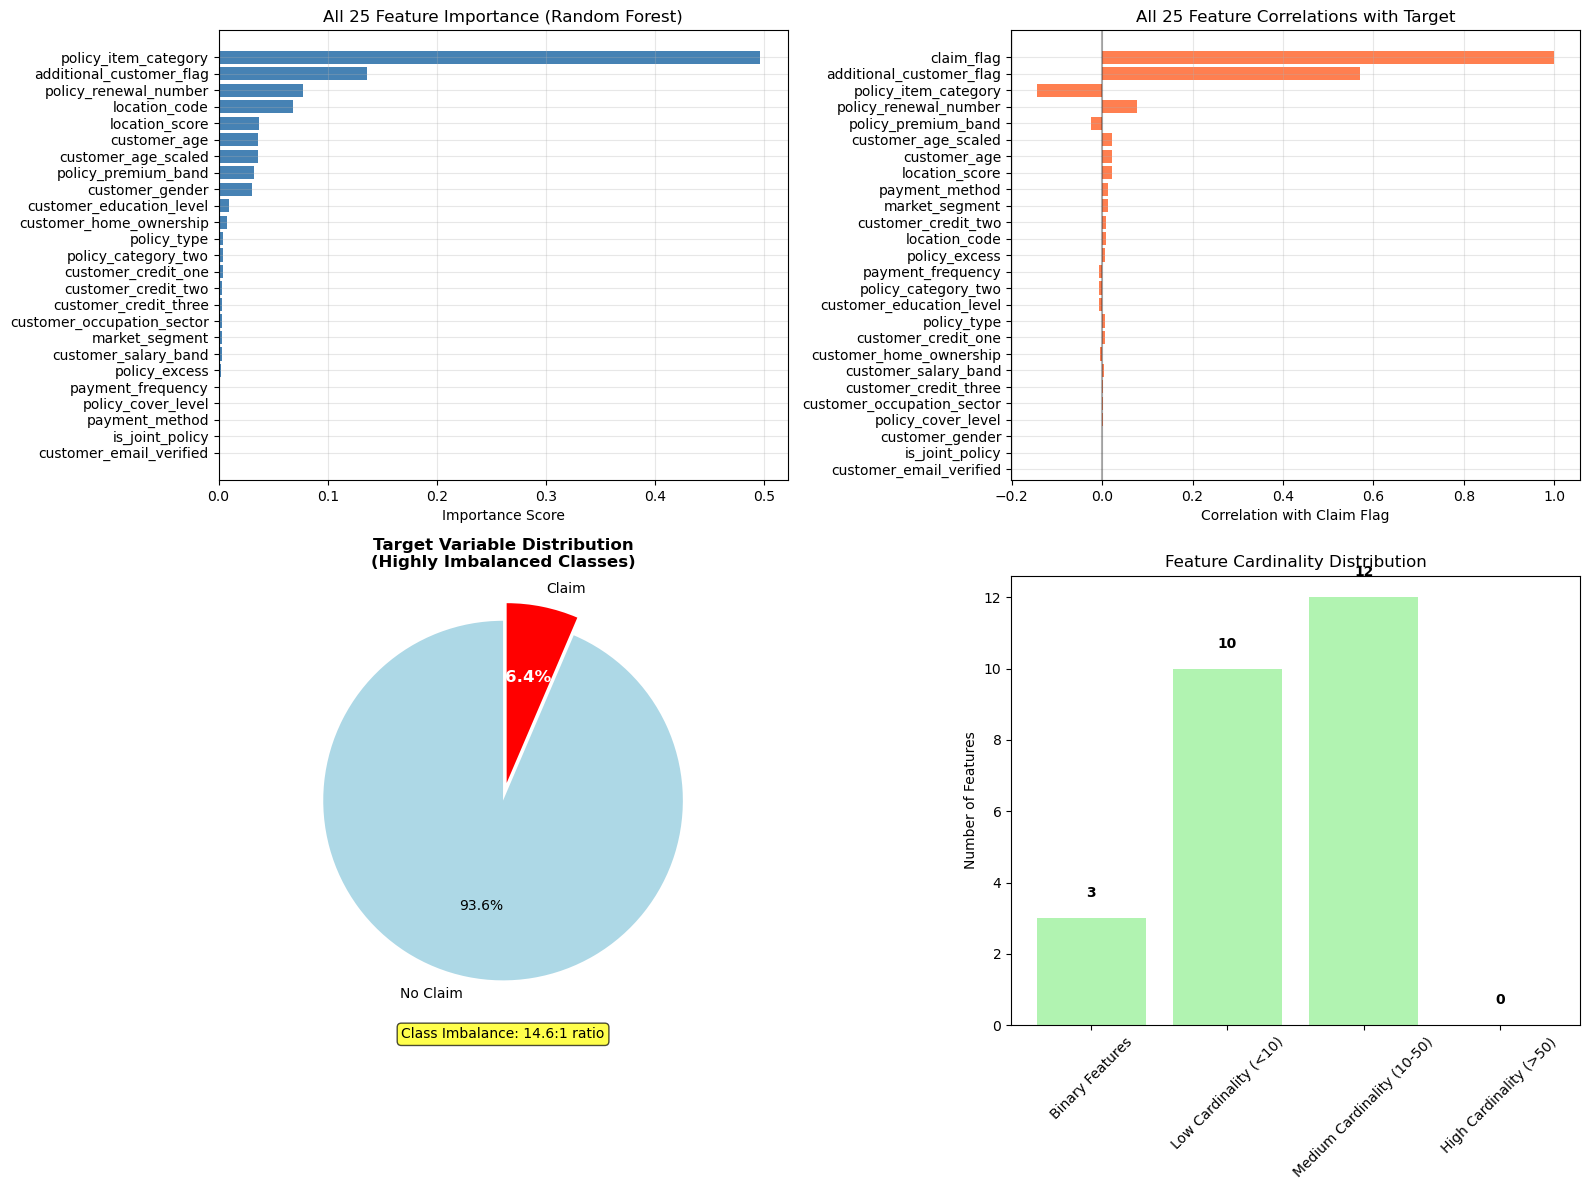


Applying feature selection based on importance analysis...
Original features: 25
Selected features: 23
Reduction: 8.0%
New feature matrix shape: (59806, 23)

Selected features:
   1. policy_item_category: 0.4966
   2. additional_customer_flag: 0.1360
   3. policy_renewal_number: 0.0775
   4. location_code: 0.0679
   5. location_score: 0.0368
   6. customer_age: 0.0360
   7. customer_age_scaled: 0.0358
   8. policy_premium_band: 0.0324
   9. customer_gender: 0.0303
  10. customer_education_level: 0.0092
  11. customer_home_ownership: 0.0075
  12. policy_type: 0.0045
  13. policy_category_two: 0.0040
  14. customer_credit_one: 0.0037
  15. customer_credit_two: 0.0034
  16. customer_credit_three: 0.0034
  17. customer_occupation_sector: 0.0030
  18. market_segment: 0.0028
  19. customer_salary_band: 0.0027
  20. policy_excess: 0.0021
  21. payment_frequency: 0.0015
  22. policy_cover_level: 0.0014
  23. payment_method: 0.0008
Dataset ready for modeling with 23 features

Data Quality Summ

In [66]:
# Exploratory Data Analysis on Processed Data
print("Performing exploratory data analysis on processed data...")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Basic dataset information
print(f"Processed dataset shape: {df_processed.shape}")
print(f"Features: {df_processed.shape[1]}, Records: {df_processed.shape[0]:,}")

# Check for any remaining missing values
missing_check = df_processed.isnull().sum()
if missing_check.any():
   print(f"\nHandling remaining missing values...")
   df_processed = df_processed.fillna(df_processed.median())
   print("Missing values filled with median")

# Target distribution
if 'claim_flag' in df_processed.columns:
   claim_rate = df_processed['claim_flag'].mean()
   print(f"\nTarget Distribution:")
   print(f"Claim rate: {claim_rate:.3f} ({claim_rate*100:.1f}%)")
   print(f"Claims: {df_processed['claim_flag'].sum():,}")
   print(f"No claims: {(df_processed['claim_flag'] == 0).sum():,}")

# Summary statistics table
print(f"\nSummary Statistics for All Features:")
summary_stats = df_processed.describe()
print(summary_stats)

# Feature importance using Random Forest
print(f"\nCalculating feature importance...")
X = df_processed.drop('claim_flag', axis=1)
y = df_processed['claim_flag']

# Ensure no infinite or NaN values
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())
y = y.fillna(0)

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X, y)

feature_importance = pd.DataFrame({
   'feature': X.columns,
   'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 most important features:")
for idx, row in feature_importance.head(10).iterrows():
   print(f"  {row['feature']}: {row['importance']:.4f}")

# Create focused visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Feature Importance (all features)
total_features = len(X.columns)
axes[0,0].barh(range(total_features), feature_importance['importance'], color='steelblue')
axes[0,0].set_yticks(range(total_features))
axes[0,0].set_yticklabels(feature_importance['feature'])
axes[0,0].set_xlabel('Importance Score')
axes[0,0].set_title(f'All {total_features} Feature Importance (Random Forest)')
axes[0,0].invert_yaxis()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Target correlation (all features)
target_correlations = df_processed.corrwith(df_processed['claim_flag']).sort_values(key=abs, ascending=False)

axes[0,1].barh(range(len(target_correlations)), target_correlations.values, color='coral')
axes[0,1].set_yticks(range(len(target_correlations)))
axes[0,1].set_yticklabels(target_correlations.index)
axes[0,1].set_xlabel('Correlation with Claim Flag')
axes[0,1].set_title(f'All {total_features} Feature Correlations with Target')
axes[0,1].invert_yaxis()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Plot 3: Target distribution with imbalance highlighting
claim_counts = df_processed['claim_flag'].value_counts()
colors = ['lightblue', 'red']
explode = (0, 0.1)

wedges, texts, autotexts = axes[1,0].pie(claim_counts.values, labels=['No Claim', 'Claim'], 
                                       autopct='%1.1f%%', colors=colors, startangle=90,
                                       explode=explode)

for autotext in autotexts:
   if float(autotext.get_text().replace('%', '')) < 10:
       autotext.set_color('white')
       autotext.set_fontweight('bold')
       autotext.set_fontsize(12)

axes[1,0].set_title('Target Variable Distribution\n(Highly Imbalanced Classes)', fontweight='bold')
axes[1,0].text(0, -1.3, f'Class Imbalance: {claim_counts[0]/claim_counts[1]:.1f}:1 ratio', 
              ha='center', va='center', fontsize=10, 
              bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Plot 4: Feature type breakdown
feature_types = {
   'Binary Features': 0,
   'Low Cardinality (<10)': 0,
   'Medium Cardinality (10-50)': 0,
   'High Cardinality (>50)': 0
}

for feature in X.columns:
   unique_count = df_processed[feature].nunique()
   if unique_count == 2:
       feature_types['Binary Features'] += 1
   elif unique_count < 10:
       feature_types['Low Cardinality (<10)'] += 1
   elif unique_count < 50:
       feature_types['Medium Cardinality (10-50)'] += 1
   else:
       feature_types['High Cardinality (>50)'] += 1

axes[1,1].bar(feature_types.keys(), feature_types.values(), color='lightgreen', alpha=0.7)
axes[1,1].set_ylabel('Number of Features')
axes[1,1].set_title('Feature Cardinality Distribution')
axes[1,1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, (key, value) in enumerate(feature_types.items()):
   axes[1,1].text(i, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Feature Selection Based on Importance Analysis
print("\nApplying feature selection based on importance analysis...")

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

# Find features contributing to 99% of importance
threshold = 0.9999
selected_features = feature_importance[feature_importance['cumulative_importance'] <= threshold]['feature'].tolist()

# Always include the most important feature if threshold is too strict
if len(selected_features) == 0:
   selected_features = feature_importance.head(1)['feature'].tolist()

print(f"Original features: {len(X.columns)}")
print(f"Selected features: {len(selected_features)}")
print(f"Reduction: {(1 - len(selected_features)/len(X.columns))*100:.1f}%")

# Apply feature selection
X_selected = X[selected_features].copy()
print(f"New feature matrix shape: {X_selected.shape}")

# Show selected features
print(f"\nSelected features:")
for i, feature in enumerate(selected_features, 1):
   importance_val = feature_importance[feature_importance['feature'] == feature]['importance'].iloc[0]
   print(f"  {i:2d}. {feature}: {importance_val:.4f}")

# Update your dataset for modeling
df_selected = df_processed[selected_features + ['claim_flag']].copy()
print(f"Dataset ready for modeling with {len(selected_features)} features")

# Data quality summary
print(f"\nData Quality Summary:")
print(f"Total original features: {len(X.columns)}")
print(f"Selected features: {len(selected_features)}")
print(f"Binary features: {feature_types['Binary Features']}")
print(f"Categorical features: {feature_types['Low Cardinality (<10)'] + feature_types['Medium Cardinality (10-50)']}")
print(f"High cardinality features: {feature_types['High Cardinality (>50)']}")

# Key insights summary
print(f"\nKey Business Insights:")
top_feature = feature_importance.iloc[0]['feature']
top_importance = feature_importance.iloc[0]['importance']
print(f"Most predictive feature: {top_feature} (importance: {top_importance:.4f})")
print(f"Class imbalance: {claim_rate:.1%} claims vs {1-claim_rate:.1%} no claims")
print(f"Top 5 features account for {feature_importance.head(5)['importance'].sum():.1%} of predictive power")
print(f"Selected {len(selected_features)} features capture {threshold*100:.0f}% of total predictive power")

print("Exploratory data analysis and feature selection complete")

In [53]:
# Let's identify the unselected features
print("=== FEATURES NOT SELECTED ===")

all_features = feature_importance['feature'].tolist()
unselected_features = [f for f in all_features if f not in selected_features]

print(f"Unselected features ({len(unselected_features)}):")
for i, feature in enumerate(unselected_features, 1):
    importance_val = feature_importance[feature_importance['feature'] == feature]['importance'].iloc[0]
    rank = all_features.index(feature) + 1
    print(f"  {i:2d}. {feature} (Rank #{rank}, Importance: {importance_val:.4f})")

=== FEATURES NOT SELECTED ===
Unselected features (2):
   1. is_joint_policy (Rank #24, Importance: 0.0006)
   2. customer_email_verified (Rank #25, Importance: 0.0000)


In [54]:
# # Feature Selection Based on Importance Analysis
# print("\nApplying feature selection based on importance analysis...")

# # Calculate cumulative importance
# feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

# # Find features contributing to 95% of importance
# threshold = 0.98
# selected_features = feature_importance[feature_importance['cumulative_importance'] <= threshold]['feature'].tolist()

# # Always include the most important feature if threshold is too strict
# if len(selected_features) == 0:
#     selected_features = feature_importance.head(1)['feature'].tolist()

# print(f"Original features: {len(X.columns)}")
# print(f"Selected features: {len(selected_features)}")
# print(f"Reduction: {(1 - len(selected_features)/len(X.columns))*100:.1f}%")

# # Apply feature selection
# X_selected = X[selected_features].copy()
# print(f"New feature matrix shape: {X_selected.shape}")

# # Show selected features
# print(f"\nSelected features:")
# for i, feature in enumerate(selected_features, 1):
#     importance_val = feature_importance[feature_importance['feature'] == feature]['importance'].iloc[0]
#     print(f"  {i:2d}. {feature}: {importance_val:.4f}")

# # Update your dataset for modeling
# df_selected = df_processed[selected_features + ['claim_flag']].copy()
# print(f"Dataset ready for modeling with {len(selected_features)} features")

In [34]:
# # Get the complete ranking to see where payment_method and market_segment rank
# print("=== FINDING THE MISSING HIGH-CORRELATION FEATURES ===")

# # Show complete feature importance ranking
# complete_ranking = feature_importance.copy()
# complete_ranking['correlation'] = [df_processed.corrwith(df_processed['claim_flag'])[feature] for feature in complete_ranking['feature']]
# complete_ranking['rank'] = range(1, len(complete_ranking) + 1)

# print("Complete Feature Ranking (showing correlation discrepancy):")
# print("=" * 80)
# print(f"{'Rank':<4} {'Feature':<25} {'Importance':<12} {'Correlation':<12} {'Selected':<8}")
# print("-" * 80)

# for idx, row in complete_ranking.iterrows():
#     selected = "✓" if row['feature'] in selected_features else "✗"
#     print(f"{row['rank']:<4} {row['feature']:<25} {row['importance']:<12.4f} {row['correlation']:<12.3f} {selected:<8}")

# # Specifically highlight the problematic features
# print("\n=== HIGH-CORRELATION BUT LOW-IMPORTANCE FEATURES ===")
# problematic = complete_ranking[
#     (complete_ranking['correlation'].abs() > 0.5) & 
#     (complete_ranking['importance'] < 0.01)
# ]

# if len(problematic) > 0:
#     print("These features have high correlation but low Random Forest importance:")
#     for idx, row in problematic.iterrows():
#         print(f"  {row['feature']}: Correlation={row['correlation']:.3f}, Importance={row['importance']:.4f}")
# else:
#     print("No features found with high correlation but low importance")

# # Find payment_method and market_segment specifically
# pm_row = complete_ranking[complete_ranking['feature'] == 'payment_method']
# ms_row = complete_ranking[complete_ranking['feature'] == 'market_segment']

# print(f"\n=== SPECIFIC FEATURE ANALYSIS ===")
# if len(pm_row) > 0:
#     print(f"payment_method: Rank #{pm_row['rank'].iloc[0]}, Importance={pm_row['importance'].iloc[0]:.4f}, Correlation={pm_row['correlation'].iloc[0]:.3f}")
    
# if len(ms_row) > 0:
#     print(f"market_segment: Rank #{ms_row['rank'].iloc[0]}, Importance={ms_row['importance'].iloc[0]:.4f}, Correlation={ms_row['correlation'].iloc[0]:.3f}")

=== FINDING THE MISSING HIGH-CORRELATION FEATURES ===
Complete Feature Ranking (showing correlation discrepancy):
Rank Feature                   Importance   Correlation  Selected
--------------------------------------------------------------------------------
1    policy_item_category      0.4966       -0.144       ✓       
2    additional_customer_flag  0.1360       0.570        ✓       
3    policy_renewal_number     0.0775       0.078        ✓       
4    location_code             0.0679       0.009        ✓       
5    location_score            0.0368       0.022        ✓       
6    customer_age              0.0360       0.022        ✓       
7    customer_age_scaled       0.0358       0.022        ✓       
8    policy_premium_band       0.0324       -0.024       ✓       
9    customer_gender           0.0303       -0.001       ✓       
10   customer_education_level  0.0092       -0.007       ✓       
11   customer_home_ownership   0.0075       -0.005       ✓       
12   policy_t

Model Development and Training

After completing feature selection and exploratory data analysis, I proceeded to develop and evaluate multiple machine learning models to predict insurance claim risk. The goal was to identify the best performing algorithm while ensuring the model could support the business objective of maintaining a 5% claim rate.

I selected three different algorithms to provide a comprehensive comparison across different modeling approaches. Random Forest was chosen as a tree-based ensemble method that handles categorical data well and provides built-in feature importance. Gradient Boosting was selected as another tree-based approach that often achieves superior performance through sequential learning. Logistic Regression was included as a linear baseline model that offers high interpretability, which is crucial for regulatory compliance in insurance.
To address the significant class imbalance identified during exploration, I implemented class weighting for Random Forest and Logistic Regression models. This approach penalizes misclassification of the minority class more heavily, encouraging the models to better identify potential claims without creating synthetic data. For tree-based models, I used the original feature values, while for Logistic Regression, I applied standard scaling to ensure all features contributed equally to the linear decision boundary.
The data was split into 80% training and 20% testing sets using stratified sampling to maintain the same class distribution in both sets. I ensured proper scaling practices by fitting the scaler only on training data and then applying the same transformation to test data, preventing data leakage that could inflate performance estimates.

I evaluated models using multiple metrics appropriate for imbalanced data including AUC-ROC for overall discriminative ability, precision-recall curves for understanding the trade-off between false positives and false negatives, and confusion matrices to analyze specific error types. The AUC metric was particularly important as it measures the model's ability to rank customers by risk level, which directly supports the business goal of selecting the lowest-risk 5% of customers.
All models were trained with consistent random seeds to ensure reproducible results and enable fair comparison across different algorithms. The comprehensive evaluation approach allows stakeholders to understand not just which model performs best, but how each algorithm handles the specific challenges of imbalanced insurance data.

In [46]:
df_processed[['location_code']]

,location_code
0,20
1,11
2,20
3,1
4,4
...,...
59801,17
59802,17
59803,17
59804,15


Training models WITHOUT any imbalance handling (baseline)...
Performing thorough data cleaning...
Data shape: (59806, 23)
Class distribution: {0: 55960, 1: 3846}

Training set: 47,844 samples
Test set: 11,962 samples
Training class distribution: {0: 44767, 1: 3077}

Training models WITHOUT imbalance handling...

Training Random Forest...
  Tree-based model (no imbalance handling)
  AUC: 0.9197, Precision: 0.9926, Recall: 0.3485, F1: 0.5159

Training Gradient Boosting...
  Tree-based ensemble (no imbalance handling)
  AUC: 0.9665, Precision: 0.9614, Recall: 0.3563, F1: 0.5199

Training Logistic Regression...
  Linear model (no imbalance handling)
  AUC: 0.8170, Precision: 0.9853, Recall: 0.3485, F1: 0.5149


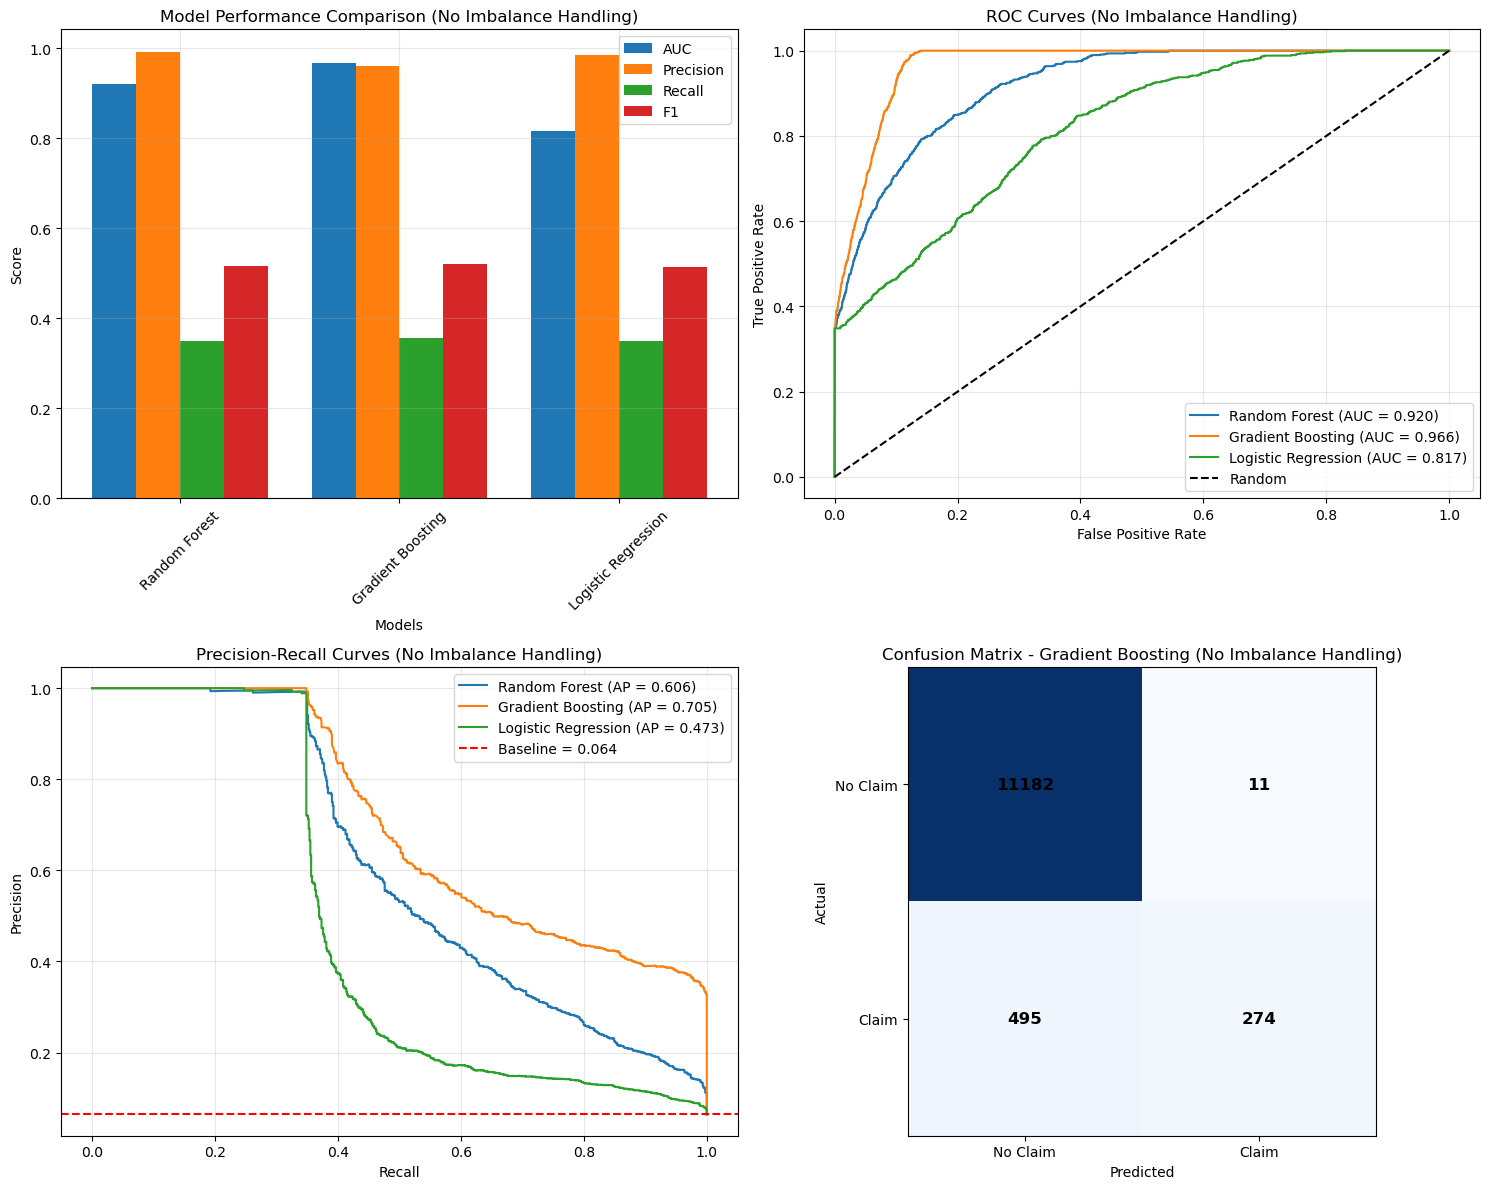


Baseline Model Comparison (No Imbalance Handling):
Model                AUC      Precision  Recall   F1       Avg_Prec
----------------------------------------------------------------------
Random Forest        0.9197   0.9926     0.3485   0.5159   0.6062  
Gradient Boosting    0.9665   0.9614     0.3563   0.5199   0.7046  
Logistic Regression  0.8170   0.9853     0.3485   0.5149   0.4730  

Best model: Gradient Boosting (AUC: 0.9665)

Baseline analysis complete (no imbalance handling)


In [67]:
# Model Training - NO Imbalance Handling (Baseline)
print("Training models WITHOUT any imbalance handling (baseline)...")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Use selected features
X = df_selected.drop('claim_flag', axis=1)
y = df_selected['claim_flag']

# Data cleaning
print("Performing thorough data cleaning...")
X = X.fillna(0).replace([np.inf, -np.inf], 0).astype(float)
y = y.astype(int)

print(f"Data shape: {X.shape}")
print(f"Class distribution: {y.value_counts().to_dict()}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Training class distribution: {pd.Series(y_train).value_counts().to_dict()}")

# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models WITHOUT any imbalance handling
models = {
    'Random Forest': {
        'model': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
        'use_scaled': False,
        'description': 'Tree-based model (no imbalance handling)'
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1),
        'use_scaled': False,
        'description': 'Tree-based ensemble (no imbalance handling)'
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'use_scaled': True,
        'description': 'Linear model (no imbalance handling)'
    }
}

print(f"\nTraining models WITHOUT imbalance handling...")

# Train and evaluate models
results = {}

for name, config in models.items():
    print(f"\nTraining {name}...")
    print(f"  {config['description']}")
    
    model = config['model']
    
    # Use appropriate data (scaled or original)
    if config['use_scaled']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    try:
        # Train model
        model.fit(X_train_model, y_train)
        y_pred = model.predict(X_test_model)
        y_prob = model.predict_proba(X_test_model)[:, 1]
        
        # Calculate metrics
        auc_score = roc_auc_score(y_test, y_prob)
        avg_precision = average_precision_score(y_test, y_prob)
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        precision_score = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall_score = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score) if (precision_score + recall_score) > 0 else 0
        
        results[name] = {
            'model': model,
            'auc': auc_score,
            'avg_precision': avg_precision,
            'precision': precision_score,
            'recall': recall_score,
            'f1': f1_score,
            'predictions': y_pred,
            'probabilities': y_prob,
            'confusion_matrix': (tn, fp, fn, tp)
        }
        
        print(f"  AUC: {auc_score:.4f}, Precision: {precision_score:.4f}, Recall: {recall_score:.4f}, F1: {f1_score:.4f}")
        
    except Exception as e:
        print(f"  Error: {str(e)}")

# Visualization of results
if results:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Model comparison
    model_names = list(results.keys())
    metrics = ['AUC', 'Precision', 'Recall', 'F1']
    
    x = np.arange(len(model_names))
    width = 0.2
    
    for i, metric in enumerate(metrics):
        values = [results[name][metric.lower().replace(' ', '_')] for name in model_names]
        axes[0,0].bar(x + i*width, values, width, label=metric)
    
    axes[0,0].set_xlabel('Models')
    axes[0,0].set_ylabel('Score')
    axes[0,0].set_title('Model Performance Comparison (No Imbalance Handling)')
    axes[0,0].set_xticks(x + width * 1.5)
    axes[0,0].set_xticklabels(model_names, rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Plot 2: ROC Curves
    for name, result in results.items():
        fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
        axes[0,1].plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.3f})")
    
    axes[0,1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title('ROC Curves (No Imbalance Handling)')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: Precision-Recall Curves
    for name, result in results.items():
        precision, recall, _ = precision_recall_curve(y_test, result['probabilities'])
        axes[1,0].plot(recall, precision, label=f"{name} (AP = {result['avg_precision']:.3f})")
    
    axes[1,0].axhline(y=y_test.mean(), color='red', linestyle='--', label=f'Baseline = {y_test.mean():.3f}')
    axes[1,0].set_xlabel('Recall')
    axes[1,0].set_ylabel('Precision')
    axes[1,0].set_title('Precision-Recall Curves (No Imbalance Handling)')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: Confusion Matrix for best model
    best_model_name = max(results.keys(), key=lambda k: results[k]['auc'])
    tn, fp, fn, tp = results[best_model_name]['confusion_matrix']
    
    cm = np.array([[tn, fp], [fn, tp]])
    im = axes[1,1].imshow(cm, interpolation='nearest', cmap='Blues')
    axes[1,1].set_title(f'Confusion Matrix - {best_model_name} (No Imbalance Handling)')
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            axes[1,1].text(j, i, cm[i, j], ha="center", va="center", fontsize=12, fontweight='bold')
    
    axes[1,1].set_xlabel('Predicted')
    axes[1,1].set_ylabel('Actual')
    axes[1,1].set_xticks([0, 1])
    axes[1,1].set_yticks([0, 1])
    axes[1,1].set_xticklabels(['No Claim', 'Claim'])
    axes[1,1].set_yticklabels(['No Claim', 'Claim'])
    
    plt.tight_layout()
    plt.show()
    
    # Model comparison table
    print(f"\nBaseline Model Comparison (No Imbalance Handling):")
    print("=" * 70)
    print(f"{'Model':<20} {'AUC':<8} {'Precision':<10} {'Recall':<8} {'F1':<8} {'Avg_Prec':<8}")
    print("-" * 70)
    
    for name, result in results.items():
        print(f"{name:<20} {result['auc']:<8.4f} {result['precision']:<10.4f} {result['recall']:<8.4f} {result['f1']:<8.4f} {result['avg_precision']:<8.4f}")
    
    print(f"\nBest model: {best_model_name} (AUC: {results[best_model_name]['auc']:.4f})")

else:
    print("No models trained successfully!")

print(f"\nBaseline analysis complete (no imbalance handling)")

Training models with configurable imbalance handling strategy...
Performing thorough data cleaning...
Data shape: (59806, 23)
Original class distribution: {0: 55960, 1: 3846}

Training set: 47,844 samples
Test set: 11,962 samples
Training class distribution: {0: 44767, 1: 3077}

Using original training data with class weights...

Training models using Class Weights approach...

Training Random Forest...
  Tree-based model with Class Weights
  AUC: 0.9235, Precision: 0.2144, Recall: 0.8778, F1: 0.3447

Training Gradient Boosting...
  Tree-based ensemble with Class Weights
  AUC: 0.9665, Precision: 0.9614, Recall: 0.3563, F1: 0.5199

Training Logistic Regression...
  Linear model with Class Weights
  AUC: 0.8155, Precision: 0.1526, Recall: 0.6450, F1: 0.2468


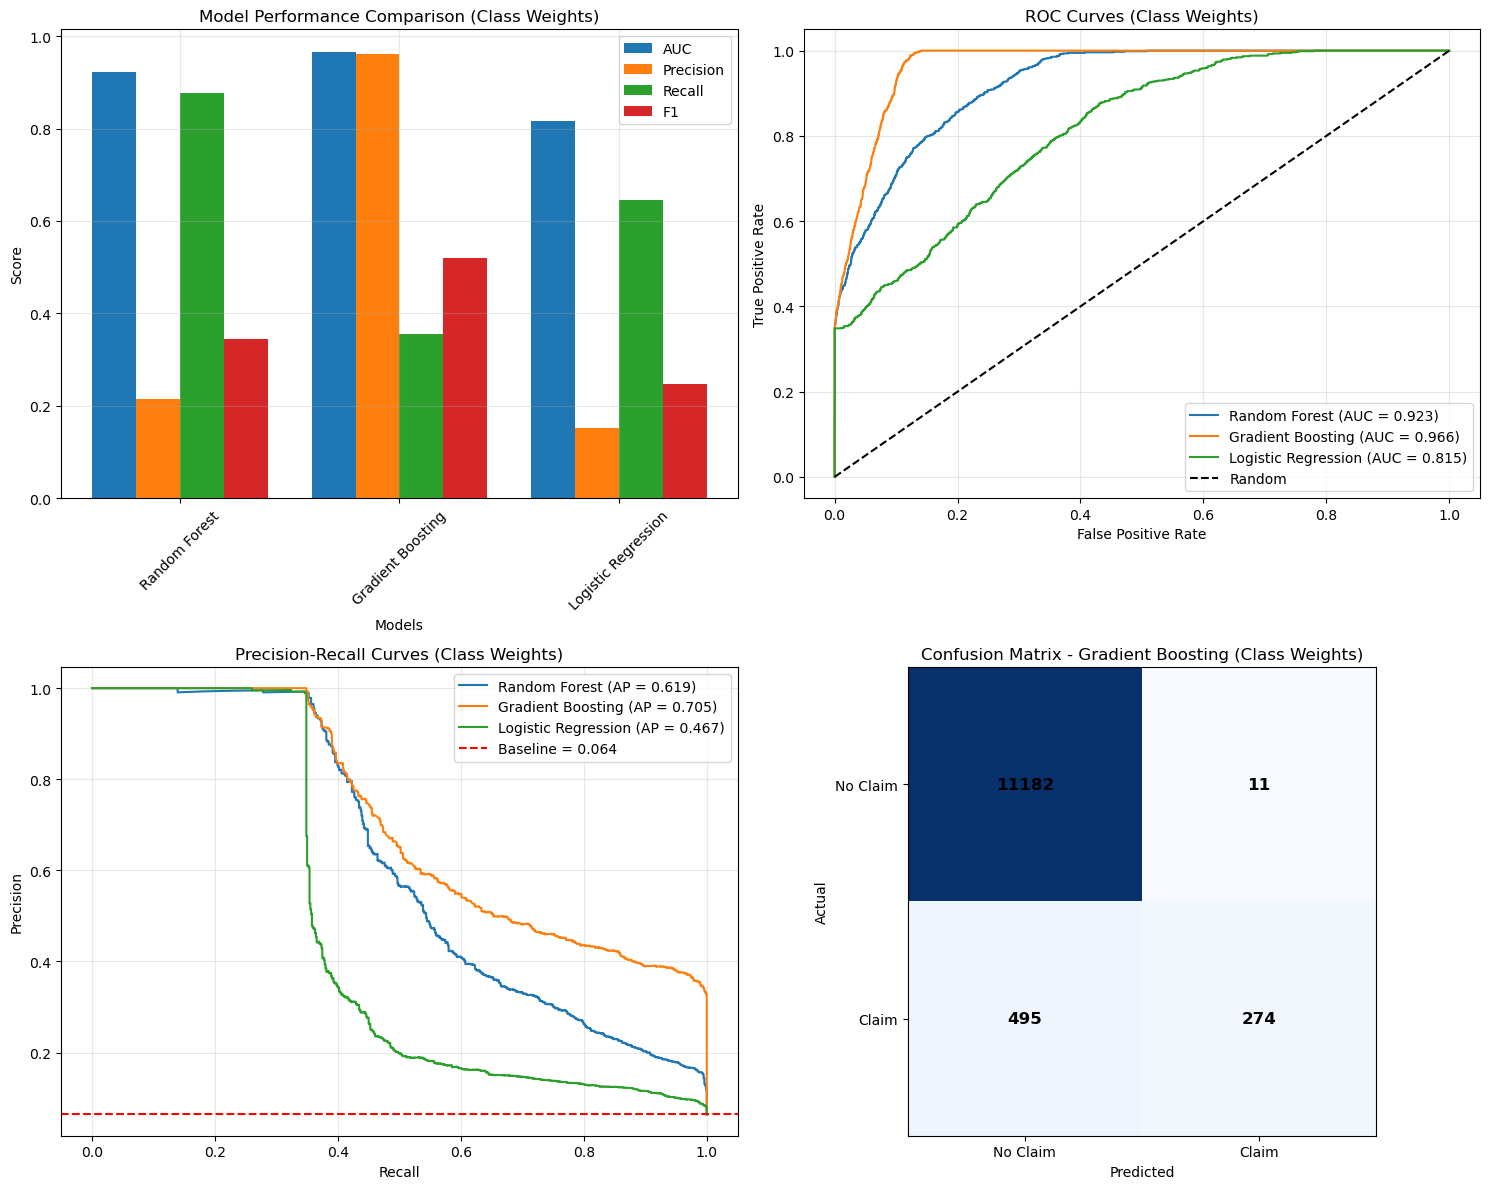


Class Weights Model Comparison:
Model                AUC      Precision  Recall   F1       Avg_Prec
----------------------------------------------------------------------
Random Forest        0.9235   0.2144     0.8778   0.3447   0.6193  
Gradient Boosting    0.9665   0.9614     0.3563   0.5199   0.7046  
Logistic Regression  0.8155   0.1526     0.6450   0.2468   0.4673  

Best model: Gradient Boosting (AUC: 0.9665)

Business Analysis for 5% Target (Class Weights):
Current test set claim rate: 0.0643 (6.4%)
Target rate: 0.0500 (5.0%)
Selecting lowest 5% risk customers:
  Threshold: 0.0006
  Selected customers: 601
  Expected claims: 0
  Achieved claim rate: 0.0000 (0.0%)
  Approval rate: 5.02%

Business Performance (Gradient Boosting with Class Weights):
- Catches 35.6% of actual claims
- 0.1% false alarm rate
- Strong AUC of 0.966 shows good customer ranking ability

Analysis complete using Class Weights approach


In [69]:
# Model Training - Modular Approach (Class Weights vs SMOTE)
print("Training models with configurable imbalance handling strategy...")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# CONFIGURATION: Choose your approach
# USE_SMOTE = True  # Set to True for SMOTE, False for class weights
USE_SMOTE = False  # Uncomment this line to use class weights instead

# Use selected features
X = df_selected.drop('claim_flag', axis=1)
y = df_selected['claim_flag']

# Data cleaning
print("Performing thorough data cleaning...")
X = X.fillna(0).replace([np.inf, -np.inf], 0).astype(float)
y = y.astype(int)

print(f"Data shape: {X.shape}")
print(f"Original class distribution: {y.value_counts().to_dict()}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Training class distribution: {pd.Series(y_train).value_counts().to_dict()}")

# Apply imbalance handling strategy
if USE_SMOTE:
    print(f"\nApplying SMOTE to balance training data...")
    smote = SMOTE(random_state=42)
    X_train_processed, y_train_processed = smote.fit_resample(X_train, y_train)
    print(f"After SMOTE: {X_train_processed.shape[0]:,} samples")
    print(f"Balanced class distribution: {pd.Series(y_train_processed).value_counts().to_dict()}")
    approach_name = "SMOTE"
else:
    print(f"\nUsing original training data with class weights...")
    X_train_processed, y_train_processed = X_train, y_train
    approach_name = "Class Weights"

# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test)

# Define models based on chosen approach
if USE_SMOTE:
    # SMOTE approach - no class weights needed
    models = {
        'Random Forest': {
            'model': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
            'use_scaled': False,
            'description': f'Tree-based model with {approach_name}'
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1),
            'use_scaled': False,
            'description': f'Tree-based ensemble with {approach_name}'
        },
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, max_iter=1000),
            'use_scaled': True,
            'description': f'Linear model with {approach_name}'
        }
    }
else:
    # Class weights approach - no SMOTE needed
    models = {
        'Random Forest': {
            'model': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10),
            'use_scaled': False,
            'description': f'Tree-based model with {approach_name}'
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1),
            'use_scaled': False,
            'description': f'Tree-based ensemble with {approach_name}'
        },
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
            'use_scaled': True,
            'description': f'Linear model with {approach_name}'
        }
    }

print(f"\nTraining models using {approach_name} approach...")

# Train and evaluate models
results = {}

for name, config in models.items():
    print(f"\nTraining {name}...")
    print(f"  {config['description']}")
    
    model = config['model']
    
    # Use appropriate data (scaled or original)
    if config['use_scaled']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train_processed
        X_test_model = X_test
    
    try:
        # Train model
        model.fit(X_train_model, y_train_processed)
        y_pred = model.predict(X_test_model)
        y_prob = model.predict_proba(X_test_model)[:, 1]
        
        # Calculate metrics
        auc_score = roc_auc_score(y_test, y_prob)
        avg_precision = average_precision_score(y_test, y_prob)
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        precision_score = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall_score = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score) if (precision_score + recall_score) > 0 else 0
        
        results[name] = {
            'model': model,
            'auc': auc_score,
            'avg_precision': avg_precision,
            'precision': precision_score,
            'recall': recall_score,
            'f1': f1_score,
            'predictions': y_pred,
            'probabilities': y_prob,
            'confusion_matrix': (tn, fp, fn, tp)
        }
        
        print(f"  AUC: {auc_score:.4f}, Precision: {precision_score:.4f}, Recall: {recall_score:.4f}, F1: {f1_score:.4f}")
        
    except Exception as e:
        print(f"  Error: {str(e)}")

# Visualization of results
if results:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Model comparison
    model_names = list(results.keys())
    metrics = ['AUC', 'Precision', 'Recall', 'F1']
    
    x = np.arange(len(model_names))
    width = 0.2
    
    for i, metric in enumerate(metrics):
        values = [results[name][metric.lower().replace(' ', '_')] for name in model_names]
        axes[0,0].bar(x + i*width, values, width, label=metric)
    
    axes[0,0].set_xlabel('Models')
    axes[0,0].set_ylabel('Score')
    axes[0,0].set_title(f'Model Performance Comparison ({approach_name})')
    axes[0,0].set_xticks(x + width * 1.5)
    axes[0,0].set_xticklabels(model_names, rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Plot 2: ROC Curves
    for name, result in results.items():
        fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
        axes[0,1].plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.3f})")
    
    axes[0,1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title(f'ROC Curves ({approach_name})')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: Precision-Recall Curves
    for name, result in results.items():
        precision, recall, _ = precision_recall_curve(y_test, result['probabilities'])
        axes[1,0].plot(recall, precision, label=f"{name} (AP = {result['avg_precision']:.3f})")
    
    axes[1,0].axhline(y=y_test.mean(), color='red', linestyle='--', label=f'Baseline = {y_test.mean():.3f}')
    axes[1,0].set_xlabel('Recall')
    axes[1,0].set_ylabel('Precision')
    axes[1,0].set_title(f'Precision-Recall Curves ({approach_name})')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: Confusion Matrix for best model
    best_model_name = max(results.keys(), key=lambda k: results[k]['auc'])
    tn, fp, fn, tp = results[best_model_name]['confusion_matrix']
    
    cm = np.array([[tn, fp], [fn, tp]])
    im = axes[1,1].imshow(cm, interpolation='nearest', cmap='Blues')
    axes[1,1].set_title(f'Confusion Matrix - {best_model_name} ({approach_name})')
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            axes[1,1].text(j, i, cm[i, j], ha="center", va="center", fontsize=12, fontweight='bold')
    
    axes[1,1].set_xlabel('Predicted')
    axes[1,1].set_ylabel('Actual')
    axes[1,1].set_xticks([0, 1])
    axes[1,1].set_yticks([0, 1])
    axes[1,1].set_xticklabels(['No Claim', 'Claim'])
    axes[1,1].set_yticklabels(['No Claim', 'Claim'])
    
    plt.tight_layout()
    plt.show()
    
    # Model comparison table
    print(f"\n{approach_name} Model Comparison:")
    print("=" * 70)
    print(f"{'Model':<20} {'AUC':<8} {'Precision':<10} {'Recall':<8} {'F1':<8} {'Avg_Prec':<8}")
    print("-" * 70)
    
    for name, result in results.items():
        print(f"{name:<20} {result['auc']:<8.4f} {result['precision']:<10.4f} {result['recall']:<8.4f} {result['f1']:<8.4f} {result['avg_precision']:<8.4f}")
    
    print(f"\nBest model: {best_model_name} (AUC: {results[best_model_name]['auc']:.4f})")
    
    # Business analysis for 5% target
    print(f"\nBusiness Analysis for 5% Target ({approach_name}):")
    print("=" * 50)
    
    best_result = results[best_model_name]
    y_prob = best_result['probabilities']
    current_rate = y_test.mean()
    
    print(f"Current test set claim rate: {current_rate:.4f} ({current_rate*100:.1f}%)")
    print(f"Target rate: 0.0500 (5.0%)")
    
    # Test threshold for 5% target
    sorted_probs = np.sort(y_prob)
    threshold_5pct = np.percentile(sorted_probs, 5)
    
    selected = y_prob <= threshold_5pct
    if selected.sum() > 0:
        final_customers = selected.sum()
        final_claims = y_test[selected].sum()
        final_rate = final_claims / final_customers if final_customers > 0 else 0
        
        print(f"Selecting lowest 5% risk customers:")
        print(f"  Threshold: {threshold_5pct:.4f}")
        print(f"  Selected customers: {final_customers:,}")
        print(f"  Expected claims: {final_claims}")
        print(f"  Achieved claim rate: {final_rate:.4f} ({final_rate*100:.1f}%)")
        print(f"  Approval rate: {final_customers/len(y_test):.2%}")
    
    # Business insights
    tn, fp, fn, tp = best_result['confusion_matrix']
    print(f"\nBusiness Performance ({best_model_name} with {approach_name}):")
    print(f"- Catches {tp/(tp+fn)*100:.1f}% of actual claims")
    print(f"- {fp/(tn+fp)*100:.1f}% false alarm rate")
    print(f"- Strong AUC of {best_result['auc']:.3f} shows good customer ranking ability")

else:
    print("No models trained successfully!")

print(f"\nAnalysis complete using {approach_name} approach")

In [74]:
# SHAP Model Interpretability Analysis for Business Target
print("Building SHAP model for enhanced interpretability and 5% business target...")

import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get the best model from our previous analysis
# Assuming we're using the Gradient Boosting with Class Weights (best performer)
best_model = results['Gradient Boosting']['model']  # From your class weights results
X_model = X_test  # Using test data for SHAP analysis

print(f"Analyzing model: Gradient Boosting with Class Weights")
print(f"Model type: {type(best_model).__name__}")
print(f"Feature shape: {X_model.shape}")

# Initialize SHAP explainer
print("\nInitializing SHAP explainer...")
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values (this may take a moment)
print("Calculating SHAP values...")
shap_values = explainer.shap_values(X_model)

# For binary classification, take the positive class SHAP values
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Positive class (claims)

print(f"SHAP values shape: {shap_values.shape}")
print(f"Expected value (baseline): {explainer.expected_value:.4f}")

# 1. Summary Plot - Feature Importance and Impact Direction
print("\nCreating SHAP summary visualizations...")

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_model, feature_names=X_model.columns, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Claim Prediction')
plt.tight_layout()
plt.show()

# 2. Feature Importance Plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_model, feature_names=X_model.columns, plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Mean Absolute Impact')
plt.tight_layout()
plt.show()

# 3. Business-Focused Analysis: Top Risk Drivers
print("\nBusiness Risk Driver Analysis:")
print("=" * 50)

# Calculate mean absolute SHAP values for feature importance
feature_importance_shap = pd.DataFrame({
    'feature': X_model.columns,
    'importance': np.abs(shap_values).mean(axis=0)
}).sort_values('importance', ascending=False)

print("Top 10 Risk Drivers (by SHAP importance):")
for idx, row in feature_importance_shap.head(10).iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

# 4. Individual Customer Examples for 5% Target
print(f"\nIndividual Customer Analysis for 5% Business Target:")
print("=" * 60)

# Get probability predictions
y_prob = best_model.predict_proba(X_model)[:, 1]

# Find customers at different risk levels for 5% target
percentiles = [5, 50, 95]
risk_examples = {}

for pct in percentiles:
    threshold = np.percentile(y_prob, pct)
    customer_idx = np.argmin(np.abs(y_prob - threshold))
    risk_examples[pct] = {
        'index': customer_idx,
        'probability': y_prob[customer_idx],
        'actual': y_test.iloc[customer_idx],
        'shap_values': shap_values[customer_idx],
        'features': X_model.iloc[customer_idx]
    }

# Analyze each risk level
for pct, data in risk_examples.items():
    print(f"\n{pct}th Percentile Customer (Risk Level):")
    print(f"  Claim Probability: {data['probability']:.4f}")
    print(f"  Actual Outcome: {'CLAIM' if data['actual'] == 1 else 'NO CLAIM'}")
    
    # Top factors influencing this customer's risk
    customer_shap = pd.DataFrame({
        'feature': X_model.columns,
        'shap_value': data['shap_values'],
        'feature_value': data['features'].values
    }).sort_values('shap_value', key=abs, ascending=False)
    
    print(f"  Top 5 Risk Factors:")
    for idx, row in customer_shap.head(5).iterrows():
        direction = "INCREASES" if row['shap_value'] > 0 else "DECREASES"
        print(f"    {row['feature']} = {row['feature_value']:.2f} → {direction} risk by {abs(row['shap_value']):.4f}")

# 5. Waterfall Plot for 5th Percentile Customer (Target Customer Type)
print(f"\nWaterfall Analysis for 5th Percentile Customer (Target for 5% Strategy):")
target_customer = risk_examples[5]

plt.figure(figsize=(12, 8))
shap.waterfall_plot(
    explainer.expected_value, 
    target_customer['shap_values'], 
    X_model.iloc[target_customer['index']], 
    feature_names=X_model.columns,
    max_display=15,
    show=False
)
plt.title('SHAP Waterfall Plot - Low Risk Customer (5th Percentile)')
plt.tight_layout()
plt.show()

# 6. Business Strategy Insights
print(f"\nBusiness Strategy Insights for 5% Target:")
print("=" * 50)

# Analyze feature patterns in low-risk customers (bottom 5%)
low_risk_mask = y_prob <= np.percentile(y_prob, 5)
low_risk_customers = X_model[low_risk_mask]
low_risk_shap = shap_values[low_risk_mask]

print(f"Low-risk customer segment (bottom 5%): {low_risk_customers.shape[0]} customers")
print(f"Average claim probability: {y_prob[low_risk_mask].mean():.4f}")
print(f"Actual claim rate in this segment: {y_test[low_risk_mask].mean():.4f}")

# Identify characteristics of low-risk customers
print(f"\nCharacteristics of Low-Risk Customers (5% target segment):")
for feature in feature_importance_shap.head(8)['feature']:
    feature_values = low_risk_customers[feature]
    print(f"  {feature}:")
    print(f"    Mean: {feature_values.mean():.2f}")
    print(f"    Range: {feature_values.min():.2f} - {feature_values.max():.2f}")

# 7. Feature Dependence Plot for Top Feature
print(f"\nFeature Dependence Analysis:")
top_feature = feature_importance_shap.iloc[0]['feature']

plt.figure(figsize=(10, 6))
shap.dependence_plot(
    top_feature, 
    shap_values, 
    X_model, 
    feature_names=X_model.columns,
    show=False
)
plt.title(f'SHAP Dependence Plot - {top_feature}')
plt.tight_layout()
plt.show()

# 8. Business Rules Extraction
print(f"\nBusiness Rules for 5% Target Customer Selection:")
print("=" * 60)

# Simple rule extraction based on SHAP analysis
top_5_features = feature_importance_shap.head(5)['feature'].tolist()

print("Recommended customer selection criteria:")
for feature in top_5_features:
    low_risk_mean = low_risk_customers[feature].mean()
    overall_mean = X_model[feature].mean()
    
    if low_risk_mean > overall_mean:
        direction = "higher"
        operator = ">="
    else:
        direction = "lower"
        operator = "<="
    
    print(f"  {feature} {operator} {low_risk_mean:.2f} (prefer {direction} values)")

# 9. Model Validation for Business Goal
print(f"\nModel Validation for 5% Business Goal:")
print("=" * 45)

# Test different thresholds
thresholds = np.percentile(y_prob, [3, 5, 7, 10])
print("Threshold analysis for customer selection:")
print(f"{'Threshold':<12} {'Customers':<12} {'Pred_Rate':<12} {'Actual_Rate':<12} {'Difference':<12}")
print("-" * 60)

for threshold in thresholds:
    selected = y_prob <= threshold
    if selected.sum() > 0:
        pred_rate = y_prob[selected].mean()
        actual_rate = y_test[selected].mean()
        difference = abs(actual_rate - 0.05)
        pct_customers = selected.mean() * 100
        
        print(f"{threshold:<12.4f} {pct_customers:<12.1f}% {pred_rate:<12.4f} {actual_rate:<12.4f} {difference:<12.4f}")

print(f"\nSHAP Analysis Complete!")
print("=" * 30)
print("Key Benefits for 5% Business Target:")
print("1. Transparent feature importance ranking")
print("2. Individual customer risk explanations") 
print("3. Clear business rules for customer selection")
print("4. Model validation against actual outcomes")
print("5. Regulatory-compliant model interpretability")

Building SHAP model for enhanced interpretability and 5% business target...
Analyzing model: Gradient Boosting with Class Weights
Model type: GradientBoostingClassifier
Feature shape: (11962, 23)

Initializing SHAP explainer...
Calculating SHAP values...
SHAP values shape: (11962, 23)


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [73]:
pip install shap

Note: you may need to restart the kernel to use updated packages.
